In [1]:
import os
import sys
from astir.data import from_csv_yaml

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn import metrics

/Users/farateod/Documents/GitHub/tribus/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [155]:
# The data has to be already normalized, they suggested a normalization method, but I didn't really understand that
expression_mat_path= "/Users/farateod/Documents/GitHub/tribus/tests/astir/data.csv"
yaml_marker_path = "/Users/farateod/Documents/GitHub/tribus/tests/astir/cell_type_descr.yml"

In [171]:
ast = from_csv_yaml(expression_mat_path, marker_yaml=yaml_marker_path)
print(ast)

Astir object, 17 cell types, 124623 cells


In [172]:
ast.fit_type(max_epochs=10, n_init=3, n_init_epochs=2)

training restart (final):  80%|████████  | 8/10 [10.07s/epochs, current loss: -1596042.7]


In [173]:
cell_types = ast.get_celltypes()

In [185]:
print(len(np.unique(cell_types)))

11


In [11]:
# "original_labels" list of the "ground_truth labels"

astrir_labels = list(cell_types["cell_type"])
original_label_types = np.unique(original_labels)
tribus_labels = [ 'other_Global' if label == 'Unknown' or label == 'Other' else label for label in astrir_labels]
cm = metrics.confusion_matrix(original_labels, tribus_labels, labels=original_label_types)

fig, ax = plt.subplots(figsize=(13,13))         # Sample figsize in inches
conf_mat = sns.heatmap(cm, xticklabels = original_label_types, yticklabels = original_label_types, vmax = 10000,  fmt="d", annot = True, ax=ax).get_figure()

NameError: name 'cell_types' is not defined

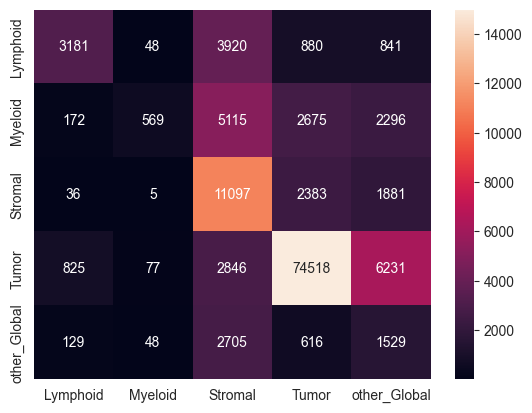

In [124]:
tribus_labels = list(cell_types["cell_type"])
original_label_types = np.unique(original_labels)
tribus_labels = [ 'other_Global' if label == 'Unknown' or label == 'Other' else label for label in tribus_labels]
cm = metrics.confusion_matrix(original_labels, tribus_labels, labels=original_label_types)
conf_mat = sns.heatmap(cm, xticklabels = original_label_types, yticklabels = original_label_types, vmax = 15000,  fmt="d", annot = True).get_figure()